In [1]:
import huggingface_hub
import os

from bitmind.synthetic_image_generation.synthetic_image_generator import SyntheticImageGenerator
from bitmind.image_dataset import ImageDataset
from bitmind.utils.data import sample_dataset_index_name
from bitmind.constants import DATASET_META, HUGGINGFACE_CACHE_DIR

/root/miniconda3/envs/bitmind/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-20 23:52:17.498785: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-20 23:52:17.596120: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-20 23:52:17.647208: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-20 23:52:17.6

In [3]:
print("Loading real datasets")
real_image_datasets = [
    ImageDataset(ds['path'], 'train', ds.get('name', None), ds['create_splits'], 'REUSE_CACHE_IF_EXISTS')
    for ds in DATASET_META['real'][:1]
]


Loading real datasets
Downloaded bitmind/open-images-v7 dataset to /workspace/.cache/huggingface


In [4]:
synthetic_image_generator = SyntheticImageGenerator(
    prompt_type='annotation', 
    use_random_diffuser=False, 
    diffuser_name='black-forest-labs/FLUX.1-dev')

/root/miniconda3/envs/bitmind/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Keyword arguments {'add_watermarker': False} are not expected by FluxPipeline and will be ignored.
Loading pipeline components...: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Loaded black-forest-labs/FLUX.1-dev using FluxPipeline.
A picture of a group of people standing in front of a small plane. The setting is a sunny day. The background is a blue sky.


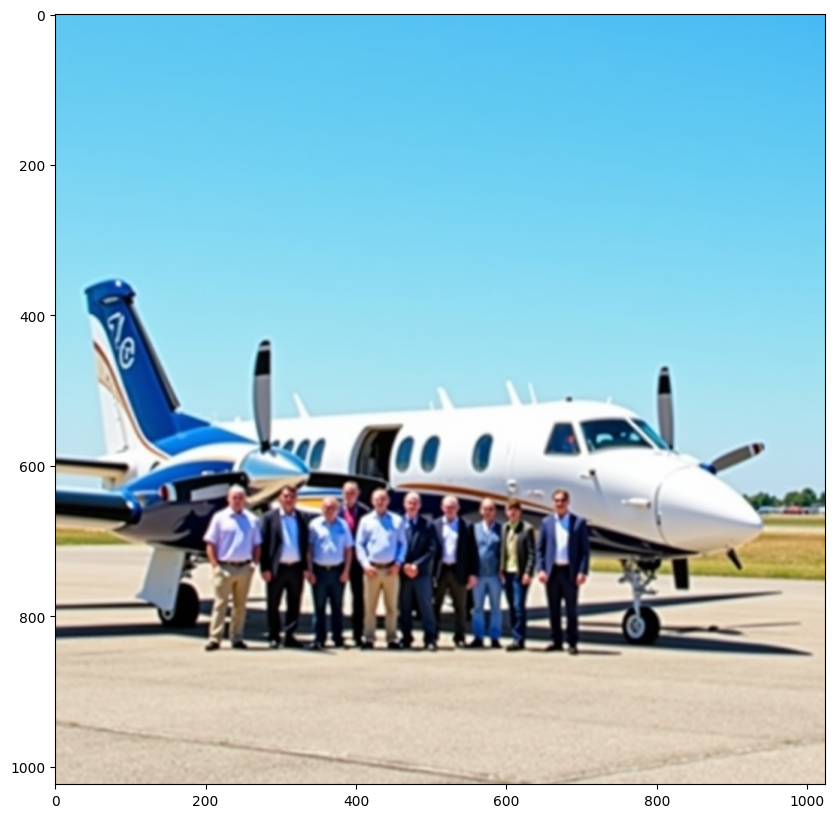

Keyword arguments {'add_watermarker': False} are not expected by FluxPipeline and will be ignored.
Loading pipeline components...: 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]


Loaded black-forest-labs/FLUX.1-dev using FluxPipeline.
A picture of a young boy holding a green apple. The setting is in a forest. The background is green.


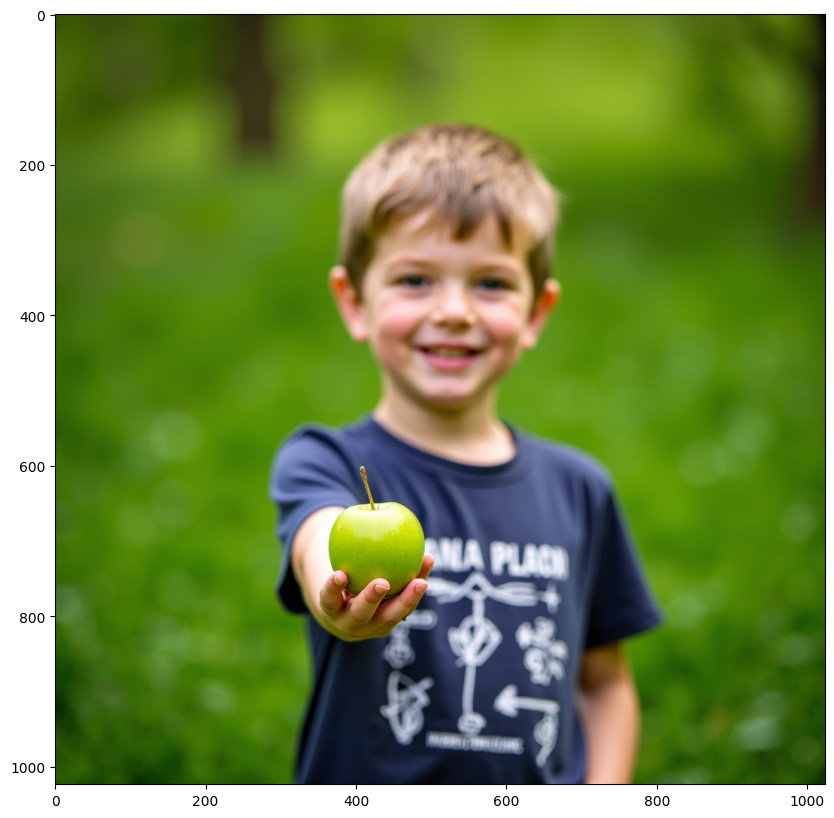

Keyword arguments {'add_watermarker': False} are not expected by FluxPipeline and will be ignored.
Loading pipeline components...: 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]


Loaded black-forest-labs/FLUX.1-dev using FluxPipeline.
A picture of a woman with a hat on her head. The setting is white and black. The background is black and white.


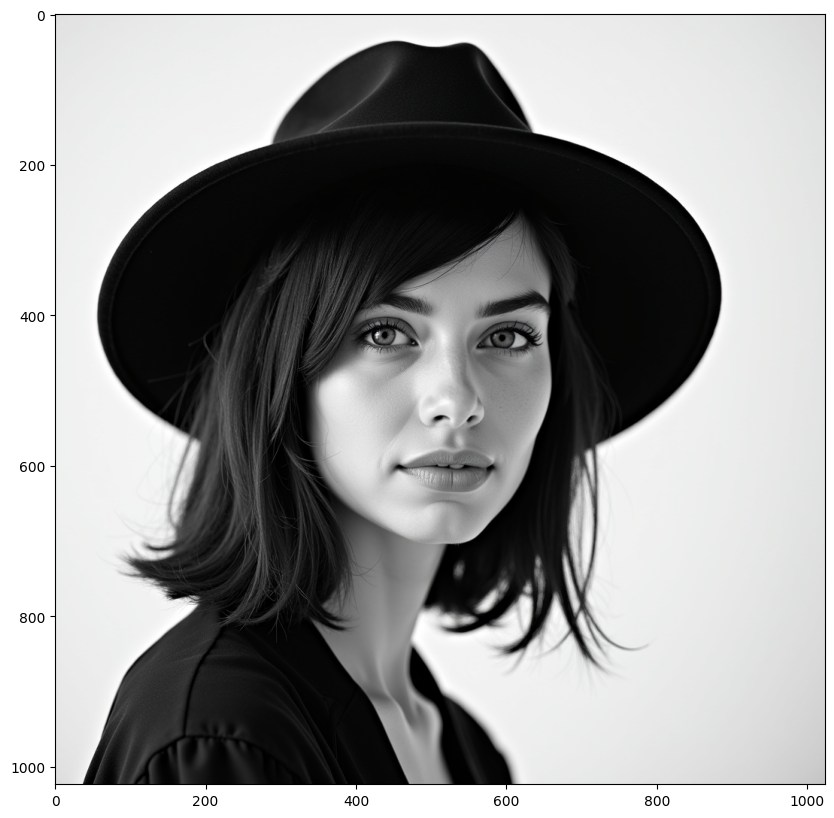

Keyword arguments {'add_watermarker': False} are not expected by FluxPipeline and will be ignored.
Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]


Loaded black-forest-labs/FLUX.1-dev using FluxPipeline.
A picture of a group of people standing in front of stonehenge. The setting is cloudy and the sky is overcast. The background is a field.


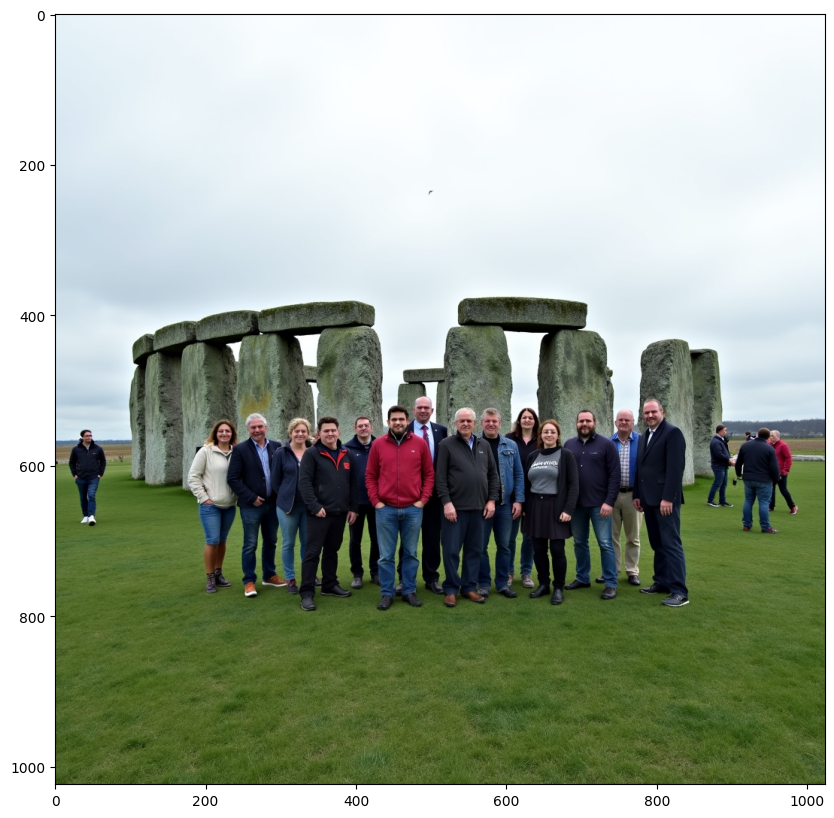

Keyword arguments {'add_watermarker': False} are not expected by FluxPipeline and will be ignored.
Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  2.44it/s]


Loaded black-forest-labs/FLUX.1-dev using FluxPipeline.
A picture of a little girl standing on a brick walkway. The setting is a small town. The background is a brick wall.


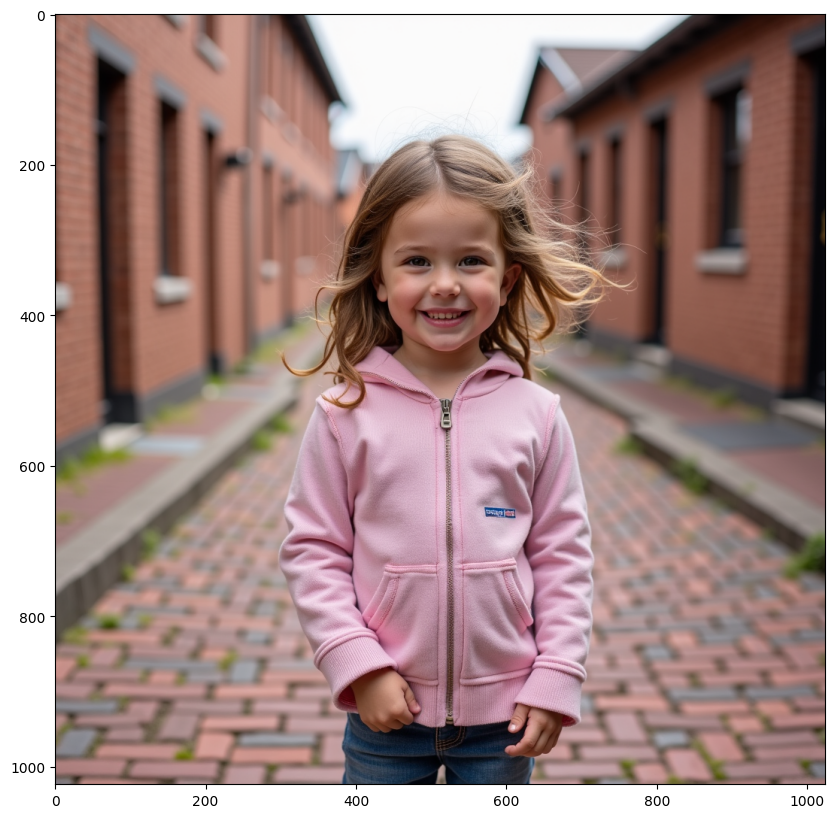

Keyword arguments {'add_watermarker': False} are not expected by FluxPipeline and will be ignored.
Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]


Loaded black-forest-labs/FLUX.1-dev using FluxPipeline.
A picture of a man playing drums in front of a crowd. The setting is outdoors. The background is a crowd of people.


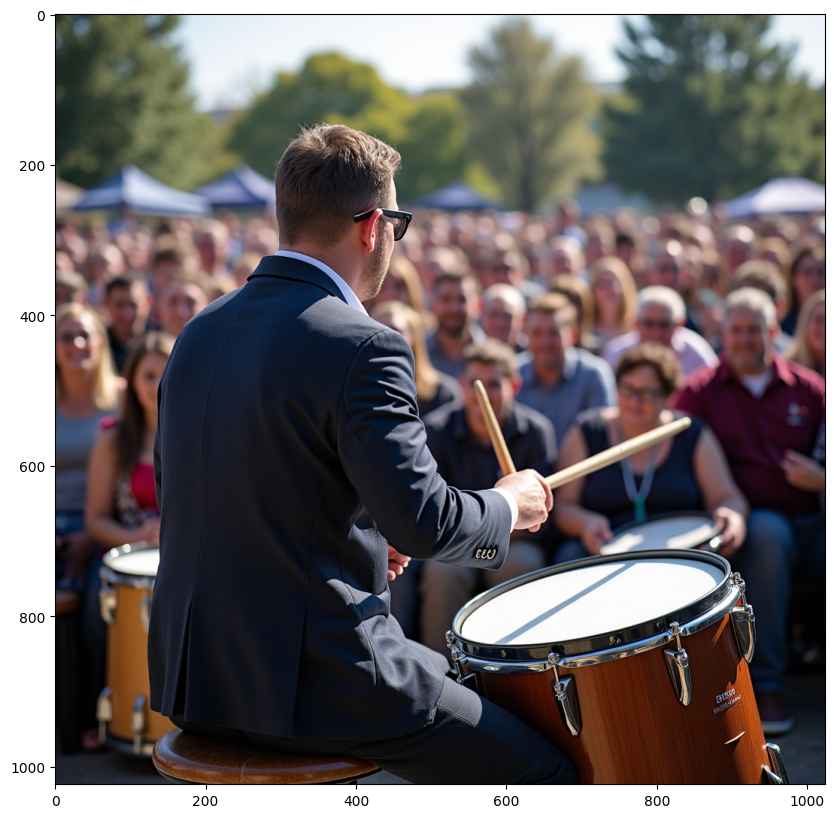

Keyword arguments {'add_watermarker': False} are not expected by FluxPipeline and will be ignored.
Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  2.42it/s]


Loaded black-forest-labs/FLUX.1-dev using FluxPipeline.
A picture of a lego man with a face and a grey shirt. The setting is a white background. The background is a white background.


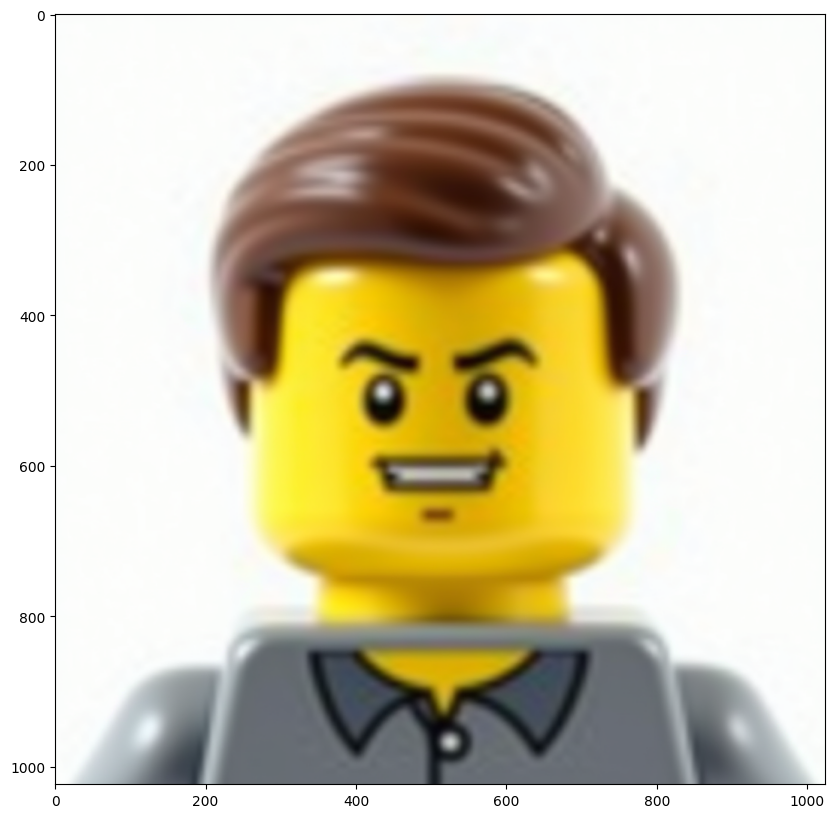

Keyword arguments {'add_watermarker': False} are not expected by FluxPipeline and will be ignored.
Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]


Loaded black-forest-labs/FLUX.1-dev using FluxPipeline.
A picture of a monument with a man on top of it. The setting is in front of a tree. The background is a blue sky.


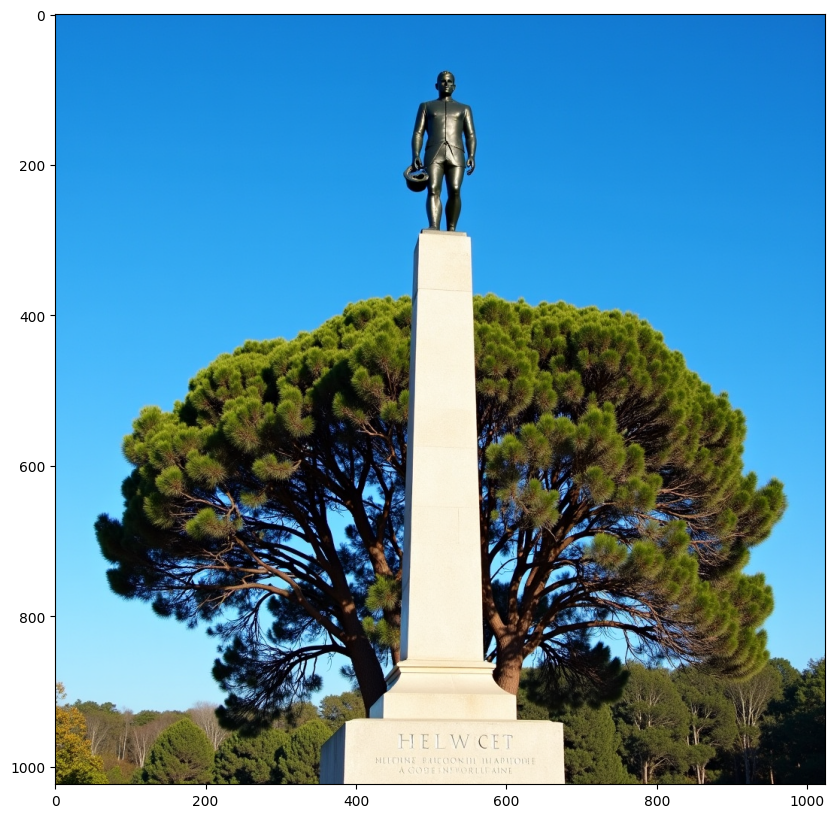

Keyword arguments {'add_watermarker': False} are not expected by FluxPipeline and will be ignored.
Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]


Loaded black-forest-labs/FLUX.1-dev using FluxPipeline.
A picture of a man in a suit and tie standing next to a man with a gun. The setting is dark. The background is black and white. The image type/style is black and white.


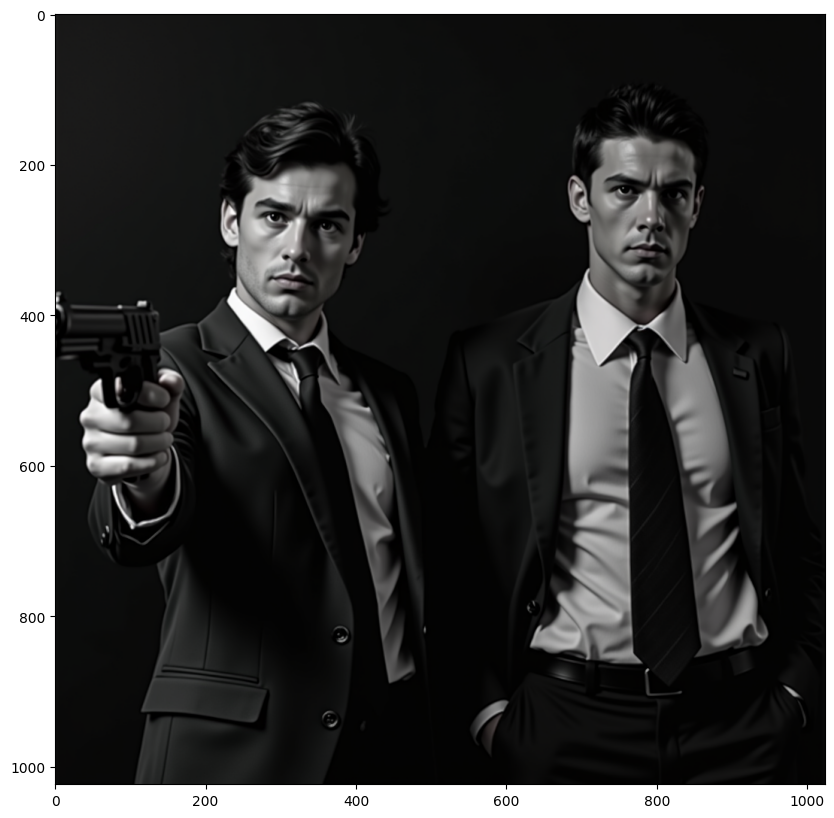

Keyword arguments {'add_watermarker': False} are not expected by FluxPipeline and will be ignored.
Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  2.44it/s]


Loaded black-forest-labs/FLUX.1-dev using FluxPipeline.
A picture of a plate of food with vegetables and meat. The setting is a table. The background is a wooden table.


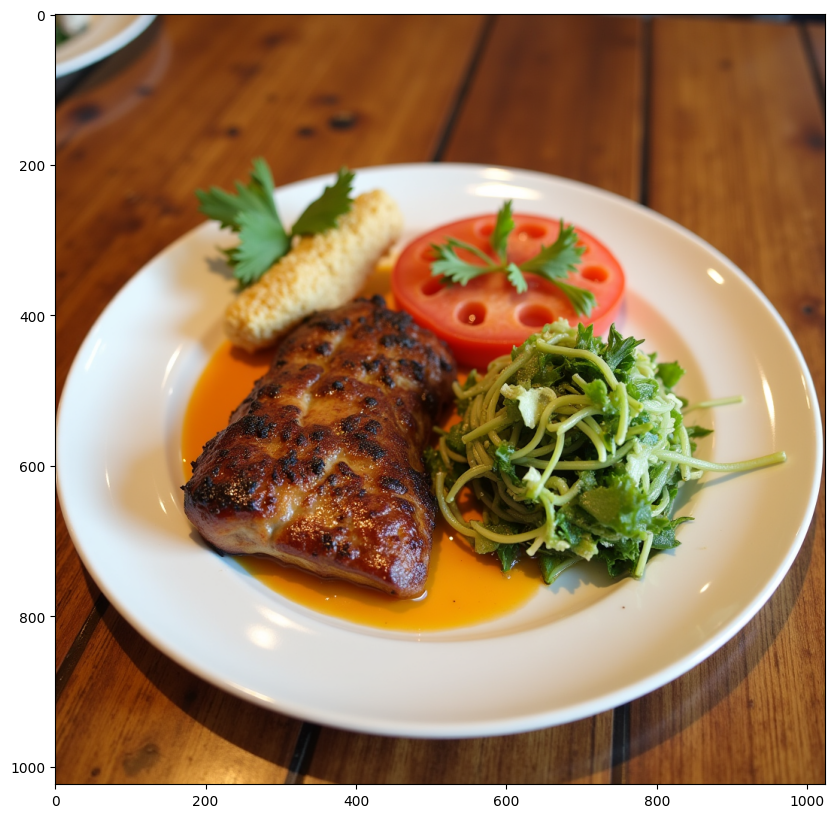

In [5]:
import matplotlib.pyplot as plt

times = []

for _ in range(10):
    real_dataset_index, source_dataset = sample_dataset_index_name(real_image_datasets)
    real_dataset = real_image_datasets[real_dataset_index]
    images_to_caption, image_indexes = real_dataset.sample(k=1)  # [{'image': PIL Image ,'id': int}, ...]
    
    # generate captions for the real images, then synthetic images from these captions
    sample = synthetic_image_generator.generate(
        k=1, real_images=images_to_caption)[0]  # {'prompt': str, 'image': PIL Image ,'id': int}

    print(sample['prompt'])
    plt.figure(figsize=(10,10))
    plt.imshow(sample['image'])
    plt.show()

    times.append(sample['gen_time'])

In [6]:
import numpy as np
np.mean(times), np.std(times)

(28.470711088180543, 0.053690352545988314)

In [7]:
print('done')


done


In [8]:
sample

{'prompt': 'A picture of a plate of food with vegetables and meat. The setting is a table. The background is a wooden table.',
 'image': <PIL.Image.Image image mode=RGB size=1024x1024>,
 'id': '1724199243.3476198.jpg',
 'gen_time': 28.399237632751465}

In [9]:
sample

{'prompt': 'A picture of a plate of food with vegetables and meat. The setting is a table. The background is a wooden table.',
 'image': <PIL.Image.Image image mode=RGB size=1024x1024>,
 'id': '1724199243.3476198.jpg',
 'gen_time': 28.399237632751465}